## ${\textbf{Libraries}}$

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ${\textbf{Import Data}}$

In [295]:
# Read both files
df_trans = pd.read_csv('trans_data.csv',  encoding='ISO-8859-1')
df_trans2 = pd.read_csv('trans_data2.csv', encoding='ISO-8859-1')

# Concatenate the DataFrames 
df_trans = pd.concat([df_trans, df_trans2])

df_trans.shape

(1067371, 8)

## ${\textbf{Data Preparation}}$

In [296]:
df_trans

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09/12/2011 12:50,4.95,12680.0,France


In [297]:
# Rename the columns
df_trans = df_trans.rename(columns={
    'Invoice': 'invoice_number',
    'StockCode': 'product_id', # Renamed from 'stock_code' to 'product_id'
    'Description': 'product_description', # Added _description for clarity
    'Quantity': 'quantity',
    'InvoiceDate': 'invoice_date',
    'Price': 'price',
    'Customer ID': 'customer_id',
    'Country': 'country'
    })

In [298]:
# Drop duplicate rows 
df_trans = df_trans.drop_duplicates()

print("Number of rows in the DataFrame after dropping duplicates:", len(df_trans))

Number of rows in the DataFrame after dropping duplicates: 1033036


In [299]:
# Checking for missing values and dtypes
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033036 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   invoice_number       1033036 non-null  object 
 1   product_id           1033036 non-null  object 
 2   product_description  1028761 non-null  object 
 3   quantity             1033036 non-null  int64  
 4   invoice_date         1033036 non-null  object 
 5   price                1033036 non-null  float64
 6   customer_id          797885 non-null   float64
 7   country              1033036 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 70.9+ MB


In [300]:
# Count the missing values
print(df_trans.isnull().sum())

invoice_number              0
product_id                  0
product_description      4275
quantity                    0
invoice_date                0
price                       0
customer_id            235151
country                     0
dtype: int64


In [301]:
# Since the analysis is centered around the invoice numbers and the products 
# sold in each transaction, missing customer_ids do not generally impact 
# the ability to conduct effective MBA. I'm mainly concerned with the presence 
# and relationships of products within each transaction.
# But let's have a quick look here as well:

# Sample of misisng customer_id's
missing_customer_id_sample = df_trans[df_trans['customer_id'].isnull()].sample(5)

print(missing_customer_id_sample)

       invoice_number product_id                 product_description  \
22606          491155      90139    FLOWER BROOCH 4 ASSORTED COLOURS   
322547         520824      21775    DECORATIVE FLORE BATHROOM BOTTLE   
221367         510983      21556        CERAMIC STRAWBERRY MONEY BOX   
69294          541969      21523  DOORMAT FANCY FONT HOME SWEET HOME   
332144         566060      22133           PINK LOVE HEART SHAPE CUP   

        quantity      invoice_date  price  customer_id         country  
22606          2  10/12/2009 09:49   5.20          NaN  United Kingdom  
322547         3  31/08/2010 12:30   2.51          NaN  United Kingdom  
221367         1  04/06/2010 12:23   5.06          NaN  United Kingdom  
69294          1  24/01/2011 13:46  14.13          NaN  United Kingdom  
332144         1  08/09/2011 15:27   1.63          NaN  United Kingdom  


In [302]:
# More importantly:
# There are 4,275 missing entries in the product_description field.
# First, I'm going to look at a sample where product_description is missing. 
# Next, I'm going to check if these missing descriptions correlate with 
# specific, for e.g. product_id's, suggesting that some products have never
# had descriptions entered. 

# Sample of misisng customer_id's
missing_product_description_sample = df_trans[df_trans['product_description'].isnull()].sample(5)

print(missing_product_description_sample)

       invoice_number product_id product_description  quantity  \
173266         551667      84539                 NaN         6   
171731         551458      22451                 NaN         3   
84643          497248     72331R                 NaN       -14   
108580         545549     15058B                 NaN       -61   
318494         520408      22302                 NaN        36   

            invoice_date  price  customer_id         country  
173266  03/05/2011 12:36    0.0          NaN  United Kingdom  
171731  28/04/2011 16:04    0.0          NaN  United Kingdom  
84643   08/02/2010 11:56    0.0          NaN  United Kingdom  
108580  03/03/2011 15:10    0.0          NaN  United Kingdom  
318494  26/08/2010 09:32    0.0          NaN  United Kingdom  


In [303]:
# Based on the sample, it appears that both product_description and 
# customer_id are missing together in certain cases. 
# The prices are zero and the quantity sometimes is negative, 
# indicating cancellations. 

# Check if zero price is common where descriptions are missing
missing_data = df_trans[df_trans['product_description'].isnull()]
print(missing_data['price'].value_counts())


price
0.0    4275
Name: count, dtype: int64


In [304]:
# All transactions with missing descriptions also have a price of 0.0.
# This could indicate that these transactions might not be actual sales 
# but other types of records such as returns, stock adjustments, or free samples.

# Explore the relationship with negative quantities
print(missing_data[missing_data['quantity'] < 0]['invoice_number'].count())

2633


In [305]:
# 2633 of the 4275 transactions with missing product_description also show
# a negative quantity. Negative quantities typically represent 
# product returns, cancellations, or inventory corrections. 

# Based on these findings, I'm not going to impute the missing product_descriptions.
# Instead I'm going to exclude the non-sales transactions (with missing desription
# and negative quantities) from further analysis: 

cleaned_data = df_trans.dropna(subset=['product_description'])
cleaned_data = cleaned_data[cleaned_data['quantity'] >= 0]

trans_data = cleaned_data

print("Number of rows in the DataFrame after dropping missing values/neg. quantities:", len(trans_data))

Number of rows in the DataFrame after dropping missing values/neg. quantities: 1008898


## ${\textbf{Preparing a subset for the MBA}}$

In [306]:
# MBA is used to uncover product affinities and customer buying patterns. 
# In my opinion, it doesn't make sense to apply a MBA to the entire dataset (12/2009 - 12/2011).
# Instead: I'm going to extract the transactions that occured between March 2010
# and July 2010. This period typically represents a (seasonal) change in consumer purchasing behavior.
# Objective: Get insights that support a targeted promotional strategy for late summer (August/September) 2010. 

# Adjust the date parsing to match the day-first format
trans_data['invoice_date'] = pd.to_datetime(trans_data['invoice_date'], format='%d/%m/%Y %H:%M')

# Now filter the data between March 2010 and July 2010
spring_summer_2010 = trans_data[(trans_data['invoice_date'] >= '2010-03-01') & (trans_data['invoice_date'] <= '2010-07-31')]
spring_summer_2010

,invoice_number,product_id,product_description,quantity,invoice_date,price,customer_id,country
106171,499510,51014C,"FEATHER PEN,COAL BLACK",12,2010-03-01 08:38:00,0.85,14798.0,United Kingdom
106172,499510,85232D,SET/3 DECOUPAGE STACKING TINS,3,2010-03-01 08:38:00,4.95,14798.0,United Kingdom
106173,499510,84279P,CHERRY BLOSSOM DECORATIVE FLASK,4,2010-03-01 08:38:00,3.75,14798.0,United Kingdom
106174,499510,84279B,CHERRY BLOSSOM DECORATIVE FLASK,4,2010-03-01 08:38:00,3.75,14798.0,United Kingdom
106175,499510,72802A,ROSE SCENT CANDLE IN JEWELLED BOX,6,2010-03-01 08:38:00,4.25,14798.0,United Kingdom
...,...,...,...,...,...,...,...,...
290422,517704,22659,LUNCH BOX I LOVE LONDON,6,2010-07-30 17:08:00,1.95,14031.0,United Kingdom
290423,517704,21658,GLASS BEURRE DISH,3,2010-07-30 17:08:00,3.95,14031.0,United Kingdom
290424,517704,22328,ROUND SNACK BOXES SET OF 4 FRUITS,8,2010-07-30 17:08:00,2.95,14031.0,United Kingdom
290425,517704,37370,RETRO COFFEE MUGS ASSORTED,72,2010-07-30 17:08:00,1.06,14031.0,United Kingdom


In [307]:
# Number of total transactions based on unique invoice numbers
print("Total transactions in trans_data:", len(trans_data['invoice_number'].unique()))
print("Total transactions in spring_summer_2010:", len(spring_summer_2010['invoice_number'].unique()))

Total transactions in trans_data: 40302
Total transactions in spring_summer_2010: 7843


## ${\textbf{Basic retail stats and distribution}}$

In [308]:
# Stock Keeping Units (SKUs)

product_counts = spring_summer_2010['product_description'].value_counts()
summary_stats = product_counts.describe()
print(summary_stats)

count    3580.000000
mean       49.380168
std        80.819682
min         1.000000
25%         6.000000
50%        18.000000
75%        57.000000
max      1273.000000
Name: count, dtype: float64


In [309]:
## Descriptive statistics of the SKUs

# Between 03/2010 - 07/2010 were 3580 unique products sold (4921 products are in total for the unfiltered trans_data). 
# The average (mean) sales frequency per product is approx. 49. 
# The standard deviation is about 80, which is quite high relative to the mean. 
# This large standard deviation suggests a significant spread in the sales frequencies 
# among the products, indicating that while some products are sold very frequently, 
# others might be sold infrequently.
# The range is from 1 to 1273, meaning the least frequently sold product was sold only once
# and the most popular product was sold 1257 times.
# The median sales frequency is 18. The median is significantly lower than the mean, 
# which is skewed by the presence of very high sales numbers for some products.

## Skewness
# The presence of a high maximum sales frequency (1273) compared to the mean (ca. 49) 
# suggests the data is right-skewed. Most products have lower sales frequencies, 
# but a few products have very high sales, which pull the mean upwards.

## Product Perfomance
# The large spread between the 75th percentile and the maximum value suggests 
# that a few products perform exceptionally well compared to the rest. 

## Inventory and Marketing
# Products at the lower end of the sales frequency (below the 25th percentile)
# might need marketing boosts or reconsideration regarding their stocking.


Number of outliers: 358


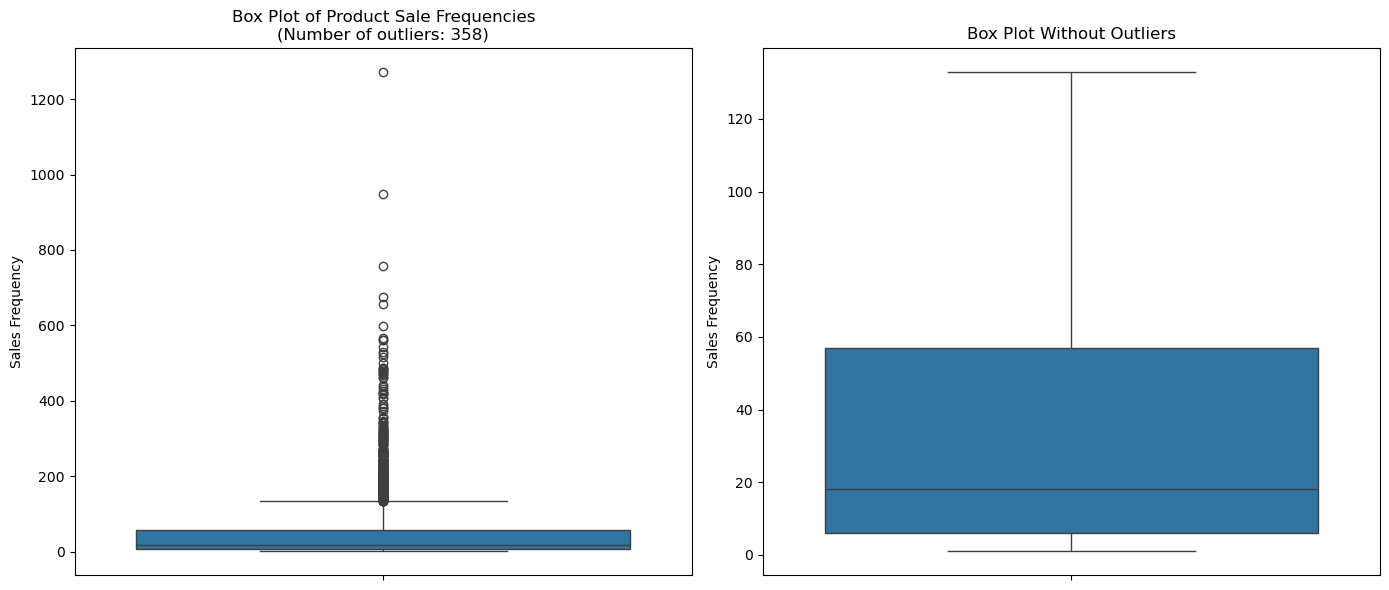

In [310]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(product_counts, 25)
Q3 = np.percentile(product_counts, 75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = product_counts[(product_counts < lower_bound) | (product_counts > upper_bound)]
print("Number of outliers:", len(outliers))

# Distribution of the SKUs
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot with outliers
sns.boxplot(y=product_counts, ax=axes[0])
axes[0].set_title(f'Box Plot of Product Sale Frequencies\n(Number of outliers: {len(outliers)})')
axes[0].set_ylabel('Sales Frequency')

# Second subplot without outliers
sns.boxplot(y=product_counts, ax=axes[1], showfliers=False)
axes[1].set_title('Box Plot Without Outliers')
axes[1].set_ylabel('Sales Frequency')

# Display the plot
plt.tight_layout()
plt.show()

In [311]:
# 353 of the 3551 products perform extremely well.
# The middle 50% of the 3551 products were sold between 5 - 57 times.

In [312]:
# Average Basket Size: Average number of items per transaction 
# and the average transaction value.

item_counts_per_transaction = spring_summer_2010.groupby('invoice_number').size()
average_basket_size = item_counts_per_transaction.mean()
print("Average Basket Size:", average_basket_size)

spring_summer_2010['total_cost'] = spring_summer_2010['quantity'] * spring_summer_2010['price']
transaction_totals = spring_summer_2010.groupby('invoice_number')['total_cost'].sum()
average_transaction_value = transaction_totals.mean()
print("Average Transaction Value:", average_transaction_value)


Average Basket Size: 22.539971949509116
Average Transaction Value: 442.20546257809514


C:\Users\timod_z7rk077\AppData\Local\Temp\ipykernel_15640\1076654718.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring_summer_2010['total_cost'] = spring_summer_2010['quantity'] * spring_summer_2010['price']


In [313]:
# During this time period, wholer salers bought 22.54 products per order,
# which on average again were about 442,21 Pound per order. 

# Unfortunatly, there is no information about the product category yet, so I can't say
# anything about the Basket Diversity yet. 

# Additional Analyses to consider: Trend Analysis, Product Lifespan, Seasonality, 
# Promotional Impact Analysis, Product Perfomance.

# But I'm only continuing with the Association Rules for co-purchased products. 

## ${\textbf{Market Basket Analysis}}$

## ${\textbf{1. Building transactions}}$

In [314]:
spring_summer_2010.head(2)

,invoice_number,product_id,product_description,quantity,invoice_date,price,customer_id,country,total_cost
106171,499510,51014C,"FEATHER PEN,COAL BLACK",12,2010-03-01 08:38:00,0.85,14798.0,United Kingdom,10.20
106172,499510,85232D,SET/3 DECOUPAGE STACKING TINS,3,2010-03-01 08:38:00,4.95,14798.0,United Kingdom,14.85


In [315]:
# Now I need to create a df where each transaction (sold products identified by
# invoice_number) is represented as a list of product_id entries. In this dataset
# the product_ids for each transaction are spread across multiple rows. 
# For better understanding, I'm using product_description instead of product_id.

# Group by 'invoice_number' and aggregate 'product_description' into lists per transaction
transactions = spring_summer_2010.groupby('invoice_number')['product_description'].apply(list).tolist()

# Print the first transaction 
print("First transaction:", transactions[0])

First transaction: ['FEATHER PEN,COAL BLACK', 'SET/3 DECOUPAGE STACKING TINS', ' CHERRY BLOSSOM  DECORATIVE FLASK', 'CHERRY BLOSSOM DECORATIVE FLASK', 'ROSE SCENT CANDLE IN JEWELLED BOX', '3 GARDENIA MORRIS BOXED CANDLES', 'ASSORTED TUTTI FRUTTI LARGE PURSE', 'VICTORIAN GLASS HANGING T-LIGHT', 'VICTORIAN  METAL POSTCARD SPRING', 'RED VICTORIAN FABRIC HEART BOX', 'LAVENDER SCENTED FABRIC HEART']


## ${\textbf{2. Finding relevant rules: Apriori}}$

In [316]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Convert transactions to an object array first
transactions_array = np.array(transactions, dtype=object)
np.save('transactions.npy', transactions_array)
itemsets = np.load('transactions.npy', allow_pickle=True)
print(len(itemsets))


7843


In [317]:
# One-hot encode data
encoder = TransactionEncoder()
onehot = encoder.fit(itemsets).transform(itemsets)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

# Apply Apriori algorithm
# Due to computational constraints, I've set the minimum support threshold to 0.01
frequent_itemsets = apriori(onehot, use_colnames=True, min_support=0.01)

In [318]:
#  Apriori algorithm results
print(frequent_itemsets.sort_values('support', ascending=False))

       support                                           itemsets
645   0.158103               (WHITE HANGING HEART T-LIGHT HOLDER)
491   0.120362                         (REGENCY CAKESTAND 3 TIER)
392   0.094352                 (PACK OF 72 RETRO SPOT CAKE CASES)
326   0.084789                             (LUNCH BAG RED SPOTTY)
582   0.081856                   (STRAWBERRY CERAMIC TRINKET BOX)
...        ...                                                ...
585   0.010073                   (STRAWBERRY HONEYCOMB  GARLAND )
1498  0.010073  (PACK OF 60 PINK PAISLEY CAKE CASES, PACK OF 7...
1213  0.010073  (PACK OF 72 RETRO SPOT CAKE CASES, SET/10 RED ...
1219  0.010073  (PACK OF 72 RETRO SPOT CAKE CASES, SINGLE HEAR...
1165  0.010073  (PACK 20 ENGLISH ROSE PAPER NAPKINS, RED SPOTT...

[1535 rows x 2 columns]


In [319]:
# After applying the Apriori algorithm to the one-hot encoded df, I now have
# a df of 1535, each row represting a frequent timeset that appeared in
# at least 1% of all transactions. 

# Single Itemsets: For example, (WHITE HANGING HEART T-LIGHT HOLDER) has a support of 0.158103. 
# This means that approximately 15.81% of all transactions in the dataset include the 
# "WHITE HANGING HEART T-LIGHT HOLDER." It indicates a high frequency and suggests 
# that this item is quite popular among customers.

# Multiple Itemsets: Such as (PACK OF 60 PINK PAISLEY CAKE CASES, PACK OF 72 RETROSPOT CAKE CASES),
# show combinations of items that are frequently bought together. A support of 0.010073 for this itemset 
# means that these two types of cake cases are bought together in about 1.01% (~80 transactions) of all transactions. 
# While lower than single item frequencies, it’s significant for combined items as it highlights specific 
# customer purchasing patterns that could be leveraged for cross-selling or promotions.

In [320]:
from mlxtend.frequent_patterns import association_rules

# Generate rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)  
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']])

## Using FP-Growth Algorithm to reduct the computational cost so that I can lower
# the min_support. 

# from mlxtend.frequent_patterns import fpgrowth
# frequent_itemsets = fpgrowth(onehot, min_support=0.005, use_colnames=True)
# rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
# print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                             antecedents  \
0     (12 PENCILS SMALL TUBE RED SPOTTY)   
1          (12 PENCILS SMALL TUBE SKULL)   
2       (72 SWEETHEART FAIRY CAKE CASES)   
3       (PACK OF 60 DINOSAUR CAKE CASES)   
4       (PACK OF 60 MUSHROOM CAKE CASES)   
...                                  ...   
1138           (CHILDS GARDEN FORK PINK)   
1139        (CHILDS GARDEN TROWEL BLUE )   
1140         (CHILDS GARDEN TROWEL PINK)   
1141          (CHILDS GARDEN FORK BLUE )   
1142      (CHILDRENS GARDEN GLOVES PINK)   

                                            consequents   support  confidence  \
0                         (12 PENCILS SMALL TUBE SKULL)  0.011730    0.528736   
1                    (12 PENCILS SMALL TUBE RED SPOTTY)  0.011730    0.575000   
2                         (60 TEATIME FAIRY CAKE CASES)  0.020783    0.584229   
3                         (60 TEATIME FAIRY CAKE CASES)  0.022823    0.594684   
4                         (60 TEATIME FAIRY CAKE CASES)  0.013515 

In [321]:
# Total rules generated: From 1535 itemsets, I've generated 1143 association rules.
# I've used a minimum threshold of 0.4 for confidence, so that the conditional
# probability of buying the consequent given a certain antecedent is at least 40%.

## ${\textbf{3. Specific Item Focus}}$

In [322]:
# Assumption: Sometimes it turnes out that certain products are not that desired from
# the customers as the retailers expected and predicted to be. 
# Instead of storing the remaining unsold goods (which would be euqal to 
# "dead capital"), they are offering discounts and cross-promotions to those "flop products". 
# Let's find such products and see how to potentially increase their sales volume.

# Inventory Analysis (if inventory data would be available),
# I would consider items with high remaining stock as indicators of flops.
# Unfortunately, there is no inventory data available. 

In [323]:
## Targeting High-Performance Outliers

# Instead of focusing solely on flop products (those below for e.g. the 10th 
# percentile in sales), this strategy targets an outlier product that 
# performs well above average yet still below expected sales volumes.

# High-Performance Outliers
top_353_products = product_counts.nlargest(353)

print("Top 10 perfming products from the top 353 outliers:")
print(top_353_products.head(10))

Top 10 perfming products from the top 353 outliers:
product_description
WHITE HANGING HEART T-LIGHT HOLDER    1273
REGENCY CAKESTAND 3 TIER               949
PACK OF 72 RETRO SPOT CAKE CASES       758
LUNCH BAG RED SPOTTY                   674
STRAWBERRY CERAMIC TRINKET BOX         656
PARTY BUNTING                          599
60 TEATIME FAIRY CAKE CASES            566
LUNCH BAG PINK RETROSPOT               562
SET/20 RED SPOTTY PAPER NAPKINS        560
LUNCH BAG SUKI  DESIGN                 543
Name: count, dtype: int64


In [324]:
# Filter for rules where 'STRAWBERRY CERAMIC TRINKET BOX' is the only antecedent
target_product = 'STRAWBERRY CERAMIC TRINKET BOX'
targeted_rules = rules[
    rules['antecedents'].apply(lambda x: x == frozenset({target_product})) &
    (rules['consequents'].apply(lambda x: len(x) == 1)) &
    (rules['confidence'] > 0.5) &  
    (rules['lift'] > 1.5)          
]

# Sorting targeted rules by confidence in descending order
sorted_targeted_rules = targeted_rules.sort_values(by='confidence', ascending=False)

# Displaying the rules
print("Association Rules for:", target_product)
print(sorted_targeted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']])


Association Rules for: STRAWBERRY CERAMIC TRINKET BOX
                          antecedents                       consequents  \
342  (STRAWBERRY CERAMIC TRINKET BOX)  (SWEETHEART CERAMIC TRINKET BOX)   

      support  confidence      lift  leverage  conviction  zhangs_metric  
342  0.046538    0.568536  9.609971  0.041696    2.180573       0.975818  


In [325]:
## Selective interpretation: 

# Total association rules found: 1.

# Support of 0.046538: This indicates that the combination of these two products 
# appears in about 4.65% of all transactions within the dataset.

# Confidence of 56.85%: More than half the time "STRAWBERRY CERAMIC TRINKET BOX" 
# is purchased, "SWEETHEART CERAMIC TRINKET BOX" is also bought.

# Zhang's Metric of 0.975818: This metric close to 1 suggests a very strong positive 
# correlation between the antecedent and consequent.

## ${\textbf{4. One Antecedent and one Consequent}}$

In [326]:
# Filter for rules with exactly one antecedent and one consequent
single_rules = rules[
    (rules['antecedents'].apply(lambda x: len(x) == 1)) & 
    (rules['consequents'].apply(lambda x: len(x) == 1)) &
    (rules['confidence'] > 0.5) & 
    (rules['lift'] > 1.5)
]

# Sorting rules by confidence in descending order
sorted_single_rules = single_rules.sort_values(by='confidence', ascending=False)

# Displaying the top 20 rules
print(sorted_single_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']].head(10))


                        antecedents                     consequents   support  \
119       (CHILDS GARDEN FORK PINK)     (CHILDS GARDEN TROWEL PINK)  0.019635   
113      (CHILDS GARDEN FORK BLUE )    (CHILDS GARDEN TROWEL BLUE )  0.018488   
67   (CAST IRON HOOK GARDEN TROWEL)    (CAST IRON HOOK GARDEN FORK)  0.011220   
122    (CHILDS GARDEN TROWEL BLUE )     (CHILDS GARDEN TROWEL PINK)  0.022058   
90   (CHILDRENS GARDEN GLOVES BLUE)  (CHILDRENS GARDEN GLOVES PINK)  0.016448   
116      (CHILDS GARDEN FORK BLUE )     (CHILDS GARDEN TROWEL PINK)  0.017595   
112      (CHILDS GARDEN FORK BLUE )       (CHILDS GARDEN FORK PINK)  0.017595   
68     (CAST IRON HOOK GARDEN FORK)  (CAST IRON HOOK GARDEN TROWEL)  0.011220   
121     (CHILDS GARDEN TROWEL PINK)    (CHILDS GARDEN TROWEL BLUE )  0.022058   
211       (KEY FOB , GARAGE DESIGN)                (KEY FOB , SHED)  0.016320   

     confidence       lift  leverage  conviction  zhangs_metric  
119    0.939024  36.640638  0.019099   15.

In [327]:
## High Confidence Values:
# Near or Above 90% Confidence: This suggests that when customers buy 
# the antecedent item, there is a 90% or greater chance they will also buy 
# the consequent. For example, 93.90% of customers who buy a Child's Garden Fork 
# in Pink also buy a Child's Garden Trowel in Pink.

## High Lift Values:
# Exceptionally High Lift: Values like 36.64 and 69.04 are significantly above 1, 
# indicating that these item pairs are purchased together much more frequently than
# would be expected if they were independent. This strong relationship is 
# especially notable and actionable.

##  High Leverage and Conviction:
# Leverage: Indicates how much more often the items occur together than expected; 
# higher values show a strong association.
# Conviction: A high conviction value suggests that the consequent is highly 
# dependent on the antecedent. For example, a conviction value of 15.97 for the 
# first rule means that the absence of the Child's Garden Fork Pink would reduce 
# the expected frequency of purchasing Child's Garden Trowel Pink by a factor 
# of almost 16.

## Zhang's Metric:
# Values Close to 1: These suggest a very strong positive correlation between 
# the item pairs.

# Seasonal Variations: Let's keep seasonality of gardening products in mind.
# Customer Segmentation: These items might appeal particularly to families 
# or individuals interested in gardening with children, which could be a segment 
# to target more specifically in marketing campaigns.

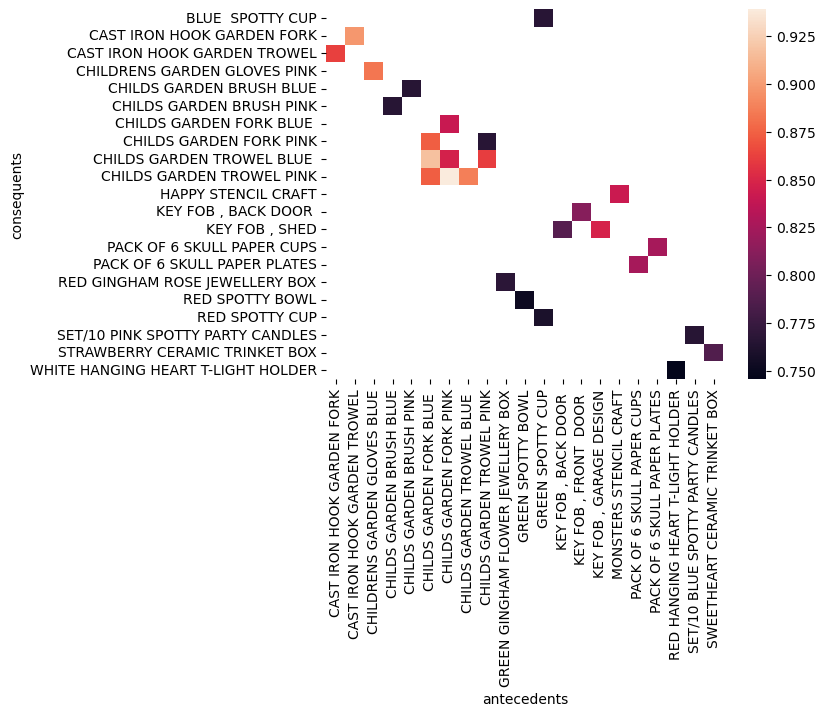

In [328]:
# Filter for rules with exactly one antecedent and one consequent
single_rules = rules[
    (rules['antecedents'].apply(lambda x: len(x) == 1)) & 
    (rules['consequents'].apply(lambda x: len(x) == 1)) &
    (rules['confidence'] > 0.5) & 
    (rules['lift'] > 1.5)
]

# Sorting rules by confidence in descending order
sorted_single_rules = single_rules.sort_values(by='confidence', ascending=False)

# Convert antecedents and consequents into strings
sorted_single_rules['antecedents'] = sorted_single_rules['antecedents'].apply(lambda a: ','.join(list(a)))
sorted_single_rules['consequents'] = sorted_single_rules['consequents'].apply(lambda a: ','.join(list(a)))

# Select the top rows based on confidence
top_20_rules = sorted_single_rules.head(27)

# Transform antecedent, consequent, and confidence columns into matrix
support_table = top_20_rules.pivot(index='consequents', columns='antecedents', values='confidence')

# Generate heatmap for the top confidence values
sns.heatmap(support_table)
plt.show()

## ${\textbf{4.1 Buy two, get one for free/}}$
## ${\textbf{Get three for a discount}}$

In [329]:
# "Buy two, get one for free" / "Get three for a discount" - promotion

two_item_rules = rules[
    (rules['antecedents'].apply(lambda x: len(x) == 2)) & 
    (rules['consequents'].apply(lambda x: len(x) == 1)) &
    (rules['confidence'] > 0.5) & 
    (rules['lift'] > 1.5)
]

# Sorting rules by confidence in descending order
two_item_rules = two_item_rules.sort_values(by='confidence', ascending=False)

# Displaying the top 10 rules
print(two_item_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']].head(15))

                                           antecedents  \
555  (CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN T...   
579  (CHILDS GARDEN FORK PINK, CHILDS GARDEN TROWEL...   
513  (CHILDS GARDEN FORK PINK, CHILDRENS GARDEN GLO...   
520  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN T...   
548  (CHILDS GARDEN FORK PINK, CHILDRENS GARDEN GLO...   
526  (CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN F...   
537  (CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN F...   
471  (CHILDS GARDEN FORK PINK, CHILDRENS GARDEN GLO...   
572  (CHILDS GARDEN TROWEL PINK, CHILDS GARDEN FORK...   
518  (CHILDS GARDEN TROWEL PINK, CHILDRENS GARDEN G...   
530  (CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN F...   
488  (CHILDS GARDEN FORK PINK, CHILDRENS GARDEN GLO...   
506  (CHILDS GARDEN FORK PINK, CHILDRENS GARDEN GLO...   
484  (CHILDS GARDEN TROWEL PINK, CHILDRENS GARDEN G...   
567  (CHILDS GARDEN FORK PINK, CHILDS GARDEN FORK B...   

                        consequents   support  confidence       lift  \

In [330]:
## Support
# The support values range from approximately 0.01 to 0.02. While these might 
# seem low,  in the context of specific combinations in a large dataset, these 
# are significant. It means that these combinations appear in 1% to 2% of all 
# transactions, a notable frequency for targeted marketing.

## Confidence
# Extremely high confidence levels (ranging from 93% to 99%) demonstrate that 
# when both antecedent items are bought, the consequent is almost always also 
# purchased. For example, a confidence of 99% for (CHILDRENS GARDEN GLOVES PINK, 
# CHILDS GARDEN TROWEL PINK) leading to (CHILDS GARDEN FORK PINK) suggests that 
# nearly all customers who buy the gloves and trowel also buy the fork.

## Lift
# Higher values here indicate that these combinations are not just coincidences.

## Conviction
# High values (such as 21.31 for one of the rules) indicate that the consequent 
# is highly likely to be bought if the antecedents are bought, and its absence 
# would significantly reduce the likelihood of the consequent being purchased.

## Zhang's metric
# Values close to 1 indicate a very strong positive correlation between the item 
# pairs, confirming the reliability of these rules in predictive scenarios.

## Promotional Bundling for Resellers

## Offering Bulk Discounts and suggested packages to wholesalers to purchase these 
# high-confidence combination items in bulk by offering discounts on complete sets. 

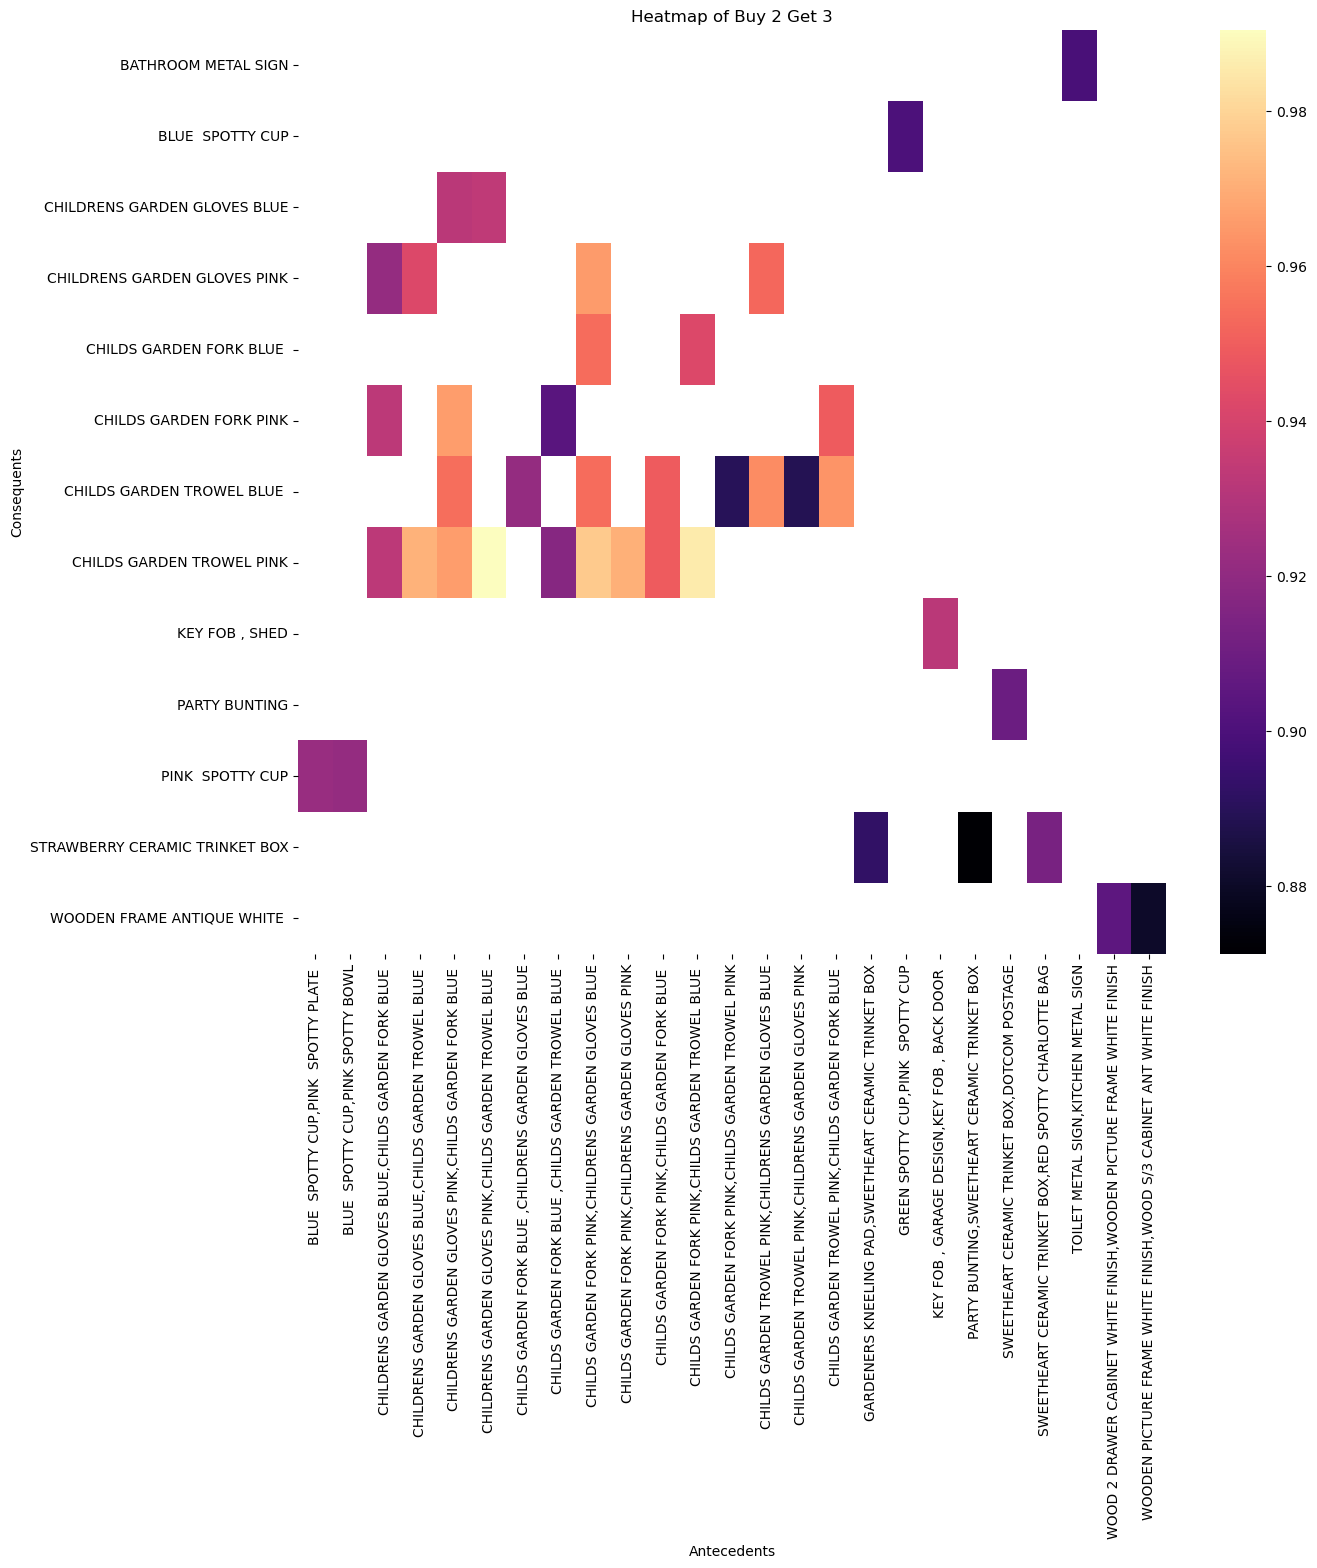

In [331]:
# Filter for rules with exactly one antecedent and one consequent
two_item_rules = rules[
    (rules['antecedents'].apply(lambda x: len(x) == 2)) & 
    (rules['consequents'].apply(lambda x: len(x) == 1)) &
    (rules['confidence'] > 0.5) & 
    (rules['lift'] > 1.5)
]

# Sorting rules by confidence in descending order
sorted_two_item_rules = two_item_rules.sort_values(by='confidence', ascending=False)

# Convert antecedents and consequents into strings
sorted_two_item_rules['antecedents'] = sorted_two_item_rules['antecedents'].apply(lambda a: ','.join(list(a)))
sorted_two_item_rules['consequents'] = sorted_two_item_rules['consequents'].apply(lambda a: ','.join(list(a)))

# Select the top rows based on confidence
top_rules = sorted_two_item_rules.head(40)  # Increased number of rules

# Transform antecedent, consequent, and confidence columns into matrix
support_table = top_rules.pivot(index='consequents', columns='antecedents', values='confidence')

# Generate heatmap for the top confidence values
plt.figure(figsize=(14, 12))  
sns.heatmap(support_table, annot=False, cmap="magma")  
plt.title('Heatmap of Buy 2 Get 3')
plt.xlabel('Antecedents')
plt.ylabel('Consequents')
plt.xticks(rotation=90)  
plt.yticks(rotation=0)
plt.show()


## ${\textbf{5. Calculating a potential bulk offer}}$